# Analysis of Crime rates and Average rent of Vancouver Neighbourhoods
_This is a notebook by Eko Francis_

## Introduction

Vancouver is known for its diverse neighbourhoods, each offering unique characteristics and living experiences. When choosing a place to live, safety and affordability are critical factors. This analysis examines the relationship between crime rates and the average rent for apartments in various neighbourhoods across Vancouver. The objectives of this analysis are to:

- Analyze crime rates by neighbourhood.
- Map crime hotspots.
- Determine the correlation between average rent and crime rates.

## Contents

[1. Import Libraries](#1.-Import-Libraries)

[2. Data Collection](#2.-Data-Collection)

[3. Data Exploration](#3.-Data-Exploration)   

[4. Data Transformation](#5.-Data-Transformation)

[5. Final Results and Visualizations](#13.-Final-Results-and-Visualizations)

[6. Conclusion](#5.-Conclusion)

## 1. Import Libraries

Before starting analysis, all the python libraries needed to be used in this notebook were imported.

In [772]:
from selenium import webdriver # import selenium to access javascript
from selenium.webdriver.chrome.service import Service
from io import StringIO
import pandas as pd # library for data analysis
from bs4 import BeautifulSoup # library for beautifulsoup
import requests # library to handle requests

import geocoder  # import geocoder
import plotly.express as px
import geopandas as gpd # to strore geospatial data
import folium
from folium import Choropleth
import chart_studio
import chart_studio.plotly as py # for exporting Plotly visualizations to Chart Studio
import plotly.graph_objects as go # to ploty Plotly graph objects
import plotly.io as pio # Plotly renderer
import matplotlib.pyplot as plt # Import Matplotlib for visualizations
import datapane as dp # for exporting map visualizations to Datapane
from plotly.subplots import make_subplots # to make multiple Plotly plots in one instance

print('import libraries completed')

import libraries completed


## 2. Data Collection
### Webs crapping Average rent in Vancouver Neighbourhoods

In this section, I used selenium to web scrap the data set for the average rent in Vancouver neighbourhoods, then converted it to a data frame. The CSV data set containing crime data in Vancouver neighbourhoods for 2023 was imported into the notebook. The geojson file for Vancouver neighbourhoods was also imported and converted to a pandas dataframe.

In [773]:
#selenium setup options
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

In [774]:
chromedriver_path = '/usr/lib/chromium-browser/chromedriver'

# Create a Service object with the chromedriver path
service = Service(chromedriver_path)

# Initialize Chrome WebDriver with service and options
wd = webdriver.Chrome(service=service, options=options)

In [775]:
# url of real estate website
url = 'https://www.zumper.com/rent-research/vancouver-bc'
wd.get(url)

In [776]:
# Get the HTML content
html = wd.page_source

In [777]:
# Wrap the HTML string in a StringIO object
df1 = pd.read_html(StringIO(html))

In [778]:
# create a dataframe for the table
df1[1]

,Neighborhoods,Average rent,Comparables
0,Downtown Vancouver,"$4,273",View
1,Fairview,"$3,136",View
2,Hastings Sunrise,"$2,571",View
3,Kensington Cedar Cottage,"$3,012",View
4,Kitsilano,"$3,489",View
5,Marpole,"$2,788",View
6,Mt Pleasant,"$3,362",View
7,Renfrew Collingwood,"$2,458",View
8,University Endowment Lands,"$4,167",View
9,West End,"$3,580",View


In [779]:
projectPath = '/mnt/c/Users/5ran6/Desktop/Projects'
# save to csv and remove index
df1[1].to_csv(projectPath+'/Crime rate and housing prices in Vancouver/housing_prices.csv', index = False)

### Load data csv files and geojson file

In [783]:
# dataset of average rent
df_prices = pd.read_csv(projectPath+'/Crime rate and housing prices in Vancouver/housing_prices.csv') 

# data set of crime rate for 2023
df_crime = pd.read_csv(projectPath+'/Crime rate and housing prices in Vancouver/crimedata_csv_AllNeighbourhoods_2023.csv')

# Vancouver geojson file
vancouver_geo = projectPath+'/Crime rate and housing prices in Vancouver/local-area-boundary.geojson'

print('datasets loaded')

datasets loaded


## 3. Data Exploration

In this section, I used the Geopy library to obtain the coordinates for Vancouver and visualised a map showing the longitudes and latitudes of Vancouver neighbourhoods.

### Geojson DataFrame

In [784]:
vancouver_gdf = gpd.read_file(vancouver_geo) # Read GEOJSON file to a Geopandas dataframe
vancouver_gdf.head() # show just 5 rows

,name,geo_point_2d,geometry
0,Downtown,"{'lon': -123.11656700827415, 'lat': 49.28074707013743}","POLYGON ((-123.11227 49.29016, -123.10424 49.28817, -123.09929 49.28927, -123.10000 49.27275, -123.10170 49.27297, -123.11108 49.27293, -123.11445 49.27177, -123.12116 49.26954, -123.12928 49.26953, -123.13768 49.27532, -123.13233 49.27693, -123.12109 49.28437, -123.13668 49.29446, -123.13469 49.29581, -123.12271 49.29150, -123.11227 49.29016))"
1,Hastings-Sunrise,"{'lon': -123.04026992328848, 'lat': 49.27793405209019}","POLYGON ((-123.05649 49.29349, -123.05190 49.29415, -123.04663 49.29418, -123.03739 49.29273, -123.02320 49.29353, -123.02323 49.29303, -123.02357 49.26553, -123.02412 49.26540, -123.02464 49.26525, -123.02517 49.26509, -123.02567 49.26490, -123.02616 49.26471, -123.02663 49.26449, -123.02709 49.26426, -123.02753 49.26401, -123.02795 49.26375, -123.02953 49.26271, -123.02969 49.26260, -123.02986 49.26250, -123.03004 49.26240, -123.03023 49.26231, -123.03043 49.26223, -123.03062 49.26215, -123.03083 49.26208, -123.03104 49.26203, -123.03127 49.26197, -123.03149 49.26193, -123.03171 49.26189, -123.03194 49.26186, -123.03217 49.26184, -123.03239 49.26183, -123.03262 49.26183, -123.04424 49.26187, -123.04424 49.26194, -123.05659 49.26198, -123.05659 49.26218, -123.05649 49.29349))"
2,Kerrisdale,"{'lon': -123.15957618168902, 'lat': 49.22365548461882}","POLYGON ((-123.17908 49.21556, -123.17564 49.21537, -123.17217 49.21528, -123.17157 49.21525, -123.17097 49.21520, -123.17037 49.21513, -123.16978 49.21503, -123.16920 49.21492, -123.16864 49.21478, -123.16809 49.21462, -123.16755 49.21444, -123.16702 49.21424, -123.16652 49.21402, -123.16599 49.21379, -123.16543 49.21358, -123.16485 49.21339, -123.16425 49.21323, -123.16365 49.21309, -123.16311 49.21296, -123.16258 49.21282, -123.16207 49.21266, -123.16157 49.21249, -123.16109 49.21229, -123.16061 49.21208, -123.16016 49.21185, -123.15973 49.21161, -123.15932 49.21136, -123.15893 49.21109, -123.15856 49.21080, -123.15821 49.21051, -123.15789 49.21020, -123.15760 49.20988, -123.15755 49.20983, -123.15750 49.20979, -123.15745 49.20974, -123.15739 49.20969, -123.15733 49.20965, -123.15726 49.20961, -123.15720 49.20958, -123.15713 49.20954, -123.15705 49.20951, -123.15697 49.20948, -123.15690 49.20945, -123.15681 49.20943, -123.15673 49.20941, -123.15665 49.20939, -123.15656 49.20937, -123.15647 49.20936, -123.15639 49.20935, -123.15630 49.20934, -123.15621 49.20933, -123.15612 49.20932, -123.15604 49.20930, -123.15595 49.20927, -123.15588 49.20925, -123.15582 49.20922, -123.15575 49.20920, -123.15568 49.20917, -123.15562 49.20913, -123.15556 49.20910, -123.15549 49.20906, -123.15544 49.20903, -123.15539 49.20898, -123.15534 49.20894, -123.15530 49.20890, -123.15292 49.20702, -123.15284 49.20696, -123.15276 49.20689, -123.15270 49.20682, -123.15264 49.20675, -123.15259 49.20667, -123.15253 49.20660, -123.15250 49.20652, -123.15247 49.20644, -123.15244 49.20636, -123.15242 49.20628, -123.15239 49.20619, -123.15236 49.20611, -123.15231 49.20603, -123.15227 49.20594, -123.15221 49.20587, -123.15215 49.20579, -123.15208 49.20572, -123.15202 49.20564, -123.15194 49.20557, -123.15186 49.20551, -123.15176 49.20544, -123.15167 49.20538, -123.15157 49.20532, -123.15147 49.20527, -123.15136 49.20522, -123.14993 49.20480, -123.14885 49.20867, -123.14818 49.20895, -123.14866 49.20946, -123.14824 49.21940, -123.14015 49.21931, -123.13960 49.23427, -123.15527 49.23452, -123.17025 49.23470, -123.17870 49.23472, -123.17908 49.21556))"
3,Marpole,"{'lon': -123.1283816596551, 'lat': 49.21020746567156}","POLYGON ((-123.10696 49.20416, -123.11153 49.20444, -123.11197 49.20446, -123.11240 49.20445, -123.11284 49.20443, -123.11327 49.20439, -123.11370 49.20433, -123.11412 49.20426, -123.11453 49.20417, -123.11719 49.20355, -123.11743 49.20348, -123.11766 49.20339, -123.11789 49.20330, -123.11811 49.20320, -123.11832 49.20309, -123.11852 49.20298, -123.11872 49.20286, -123.11890 49.20273, -123.1190

In [785]:
#split geo_point_2d into 2 columns longitude and latitude

# Define a function to extract longitude and latitude from a dictionary
def extract_coordinates(row):
    try:
        lon = row['lon']  # Extract longitude
        lat = row['lat']  # Extract latitude
        return lon, lat
    except Exception as e:
        print(f"Error: {e}")
        return None, None

# Apply the function to create new columns for longitude and latitude
vancouver_gdf[['longitude', 'latitude']] = vancouver_gdf['geo_point_2d'].apply(lambda x: pd.Series(extract_coordinates(x)))
vancouver_gdf = vancouver_gdf.drop(columns = 'geo_point_2d') # drop irrelevant column
vancouver_gdf.head() # show just 5 rows

,name,geometry,longitude,latitude
0,Downtown,"POLYGON ((-123.11227 49.29016, -123.10424 49.28817, -123.09929 49.28927, -123.10000 49.27275, -123.10170 49.27297, -123.11108 49.27293, -123.11445 49.27177, -123.12116 49.26954, -123.12928 49.26953, -123.13768 49.27532, -123.13233 49.27693, -123.12109 49.28437, -123.13668 49.29446, -123.13469 49.29581, -123.12271 49.29150, -123.11227 49.29016))",-123.116567,49.280747
1,Hastings-Sunrise,"POLYGON ((-123.05649 49.29349, -123.05190 49.29415, -123.04663 49.29418, -123.03739 49.29273, -123.02320 49.29353, -123.02323 49.29303, -123.02357 49.26553, -123.02412 49.26540, -123.02464 49.26525, -123.02517 49.26509, -123.02567 49.26490, -123.02616 49.26471, -123.02663 49.26449, -123.02709 49.26426, -123.02753 49.26401, -123.02795 49.26375, -123.02953 49.26271, -123.02969 49.26260, -123.02986 49.26250, -123.03004 49.26240, -123.03023 49.26231, -123.03043 49.26223, -123.03062 49.26215, -123.03083 49.26208, -123.03104 49.26203, -123.03127 49.26197, -123.03149 49.26193, -123.03171 49.26189, -123.03194 49.26186, -123.03217 49.26184, -123.03239 49.26183, -123.03262 49.26183, -123.04424 49.26187, -123.04424 49.26194, -123.05659 49.26198, -123.05659 49.26218, -123.05649 49.29349))",-123.040270,49.277934
2,Kerrisdale,"POLYGON ((-123.17908 49.21556, -123.17564 49.21537, -123.17217 49.21528, -123.17157 49.21525, -123.17097 49.21520, -123.17037 49.21513, -123.16978 49.21503, -123.16920 49.21492, -123.16864 49.21478, -123.16809 49.21462, -123.16755 49.21444, -123.16702 49.21424, -123.16652 49.21402, -123.16599 49.21379, -123.16543 49.21358, -123.16485 49.21339, -123.16425 49.21323, -123.16365 49.21309, -123.16311 49.21296, -123.16258 49.21282, -123.16207 49.21266, -123.16157 49.21249, -123.16109 49.21229, -123.16061 49.21208, -123.16016 49.21185, -123.15973 49.21161, -123.15932 49.21136, -123.15893 49.21109, -123.15856 49.21080, -123.15821 49.21051, -123.15789 49.21020, -123.15760 49.20988, -123.15755 49.20983, -123.15750 49.20979, -123.15745 49.20974, -123.15739 49.20969, -123.15733 49.20965, -123.15726 49.20961, -123.15720 49.20958, -123.15713 49.20954, -123.15705 49.20951, -123.15697 49.20948, -123.15690 49.20945, -123.15681 49.20943, -123.15673 49.20941, -123.15665 49.20939, -123.15656 49.20937, -123.15647 49.20936, -123.15639 49.20935, -123.15630 49.20934, -123.15621 49.20933, -123.15612 49.20932, -123.15604 49.20930, -123.15595 49.20927, -123.15588 49.20925, -123.15582 49.20922, -123.15575 49.20920, -123.15568 49.20917, -123.15562 49.20913, -123.15556 49.20910, -123.15549 49.20906, -123.15544 49.20903, -123.15539 49.20898, -123.15534 49.20894, -123.15530 49.20890, -123.15292 49.20702, -123.15284 49.20696, -123.15276 49.20689, -123.15270 49.20682, -123.15264 49.20675, -123.15259 49.20667, -123.15253 49.20660, -123.15250 49.20652, -123.15247 49.20644, -123.15244 49.20636, -123.15242 49.20628, -123.15239 49.20619, -123.15236 49.20611, -123.15231 49.20603, -123.15227 49.20594, -123.15221 49.20587, -123.15215 49.20579, -123.15208 49.20572, -123.15202 49.20564, -123.15194 49.20557, -123.15186 49.20551, -123.15176 49.20544, -123.15167 49.20538, -123.15157 49.20532, -123.15147 49.20527, -123.15136 49.20522, -123.14993 49.20480, -123.14885 49.20867, -123.14818 49.20895, -123.14866 49.20946, -123.14824 49.21940, -123.14015 49.21931, -123.13960 49.23427, -123.15527 49.23452, -123.17025 49.23470, -123.17870 49.23472, -123.17908 49.21556))",-123.159576,49.223655
3,Marpole,"POLYGON ((-123.10696 49.20416, -123.11153 49.20444, -123.11197 49.20446, -123.11240 49.20445, -123.11284 49.20443, -123.11327 49.20439, -123.11370 49.20433, -123.11412 49.20426, -123.11453 49.20417, -123.11719 49.20355, -123.11743 49.20348, -123.11766 49.20339, -123.11789 49.20330, -123.11811 49.20320, -123.11832 49.20309, -123.11852 49.20298, -123.11872 49.20286, -123.11890 49.20273, -123.11907 49.20260, -123.11923 49.20246, -123.11938 49.20231, -123.11952 49.20216, -123.11965 49.20201, -123.11980 49.20188, -123.11996 49.20174, -123.12012 49.201

### Scatter map of Vancouver showing 22 Neighbourhoods

In [786]:
# to get longitude and latitude cordinates
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

address = 'Vancouver' # name of city we want the location coordinates
geolocator = Nominatim(user_agent="vancouver_explorer") # user agent. You can use any name
location = geolocator.geocode(address)
van_lat = location.latitude # store longitude value
van_lon = location.longitude # store latitude value

print(van_lat,van_lon )

49.2608724 -123.113952


In [787]:

# Extract latitude and longitude coordinates
vancouver_gdf['coordinates'] = vancouver_gdf.apply(lambda row: (row.geometry.centroid.y, row.geometry.centroid.x), axis=1)

# Create a folium map centered at a location of your choice
map_center = [49.2608724, -123.113952]  # Set latitude and longitude for the map center
map_zoom = 10  # Set initial zoom level for the map
mymap = folium.Map(location=map_center, zoom_start=map_zoom)

# Add scatter plot points to the map
for index, row in vancouver_gdf.iterrows():
    folium.Marker(location=row['coordinates']).add_to(mymap)

# Save the map to an HTML file
mymap.save("scatter_map.html")

from IPython.display import display
display(mymap)

Data sets imported were processed for further analysis. I dropped irrelevant columns, and this did not impact the data set, as the relevant columns required for analysis were the 'Neighbourhoods' and 'Average rent' columns for the Average rent data set and the 'Type and Neighbourhoods' columns for the crime data set.

### Cleaning average rent data set

In [788]:
# drop irrelevant column from average rent data set
df_prices = df_prices.drop(columns = 'Comparables')
df_prices

,Neighborhoods,Average rent
0,Downtown Vancouver,"$4,273"
1,Fairview,"$3,136"
2,Hastings Sunrise,"$2,571"
3,Kensington Cedar Cottage,"$3,012"
4,Kitsilano,"$3,489"
5,Marpole,"$2,788"
6,Mt Pleasant,"$3,362"
7,Renfrew Collingwood,"$2,458"
8,University Endowment Lands,"$4,167"
9,West End,"$3,580"


### Cleaning crime data set

In [789]:
print(df_crime.columns) # verify column names

Index(['TYPE', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'HUNDRED_BLOCK',
       'NEIGHBOURHOOD', 'X', 'Y'],
      dtype='object')


In [790]:
#drop irrelevant columns
columns_to_drop = ['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'HUNDRED_BLOCK', 'X', 'Y']
df_crime = df_crime.drop(columns=columns_to_drop) # Drop multiple columns by name
df_crime

,TYPE,NEIGHBOURHOOD
0,Break and Enter Residential/Other,Kensington-Cedar Cottage
1,Break and Enter Residential/Other,Kensington-Cedar Cottage
2,Break and Enter Residential/Other,Kensington-Cedar Cottage
3,Break and Enter Residential/Other,Kensington-Cedar Cottage
4,Break and Enter Residential/Other,Kensington-Cedar Cottage
...,...,...
36657,Break and Enter Residential/Other,Shaughnessy
36658,Break and Enter Residential/Other,Shaughnessy
36659,Break and Enter Residential/Other,Grandview-Woodland
36660,Break and Enter Residential/Other,Shaughnessy


## 4. Data Transformation

Dataframes were aggregated and merged in this section. 
- Crime data was aggregated to get the top 10 neighbourhoods with the highest crime counts.
- The geojson data set was merged with the crime data set to map crime hotspots in Vancouver neighbourhoods.
- The Average rent and Crime data were also merged to get the correlation between crime and average rent in Vancouver neighbourhoods.

In [791]:
print(df_crime.columns)

Index(['TYPE', 'NEIGHBOURHOOD'], dtype='object')


### Aggregate crime data by crime type

In [792]:
#count of type of crime in all neighbourhoods
type_counts = df_crime.groupby('TYPE').size().reset_index(name='Crime count')
# Sort the DataFrame in descending order by 'Crime count'
type_counts = type_counts.sort_values(by='Crime count', ascending=False)

type_counts

,TYPE,Crime count
5,Other Theft,12811
6,Theft from Vehicle,7367
3,Mischief,6455
4,Offence Against a Person,4030
0,Break and Enter Commercial,1834
1,Break and Enter Residential/Other,1191
10,Vehicle Collision or Pedestrian Struck (with Injury),1157
7,Theft of Bicycle,1048
8,Theft of Vehicle,739
9,Vehicle Collision or Pedestrian Struck (with Fatality),16


### Aggregate crime data by neighbourhood

In [793]:
# count of crimes in neighbourhoods
neighbourhood_counts = df_crime.groupby('NEIGHBOURHOOD').size().reset_index(name='Crime count')
# Sort the DataFrame in descending order by 'Crime count'
neighbourhood_counts = neighbourhood_counts.sort_values(by='Crime count', ascending=False)

# Print the result
print(neighbourhood_counts)

                NEIGHBOURHOOD  Crime count
1   Central Business District        12253
19                 Strathcona         2845
22                   West End         2826
14        Renfrew-Collingwood         2594
11             Mount Pleasant         2243
3                    Fairview         1792
4          Grandview-Woodland         1716
6    Kensington-Cedar Cottage         1634
20                     Sunset         1440
9                   Kitsilano         1232
5            Hastings-Sunrise          950
10                    Marpole          899
15                 Riley Park          643
21        Victoria-Fraserview          585
8                   Killarney          568
7                  Kerrisdale          408
2           Dunbar-Southlands          371
13                   Oakridge          340
17               South Cambie          333
23            West Point Grey          280
0               Arbutus Ridge          273
16                Shaughnessy          233
18         

### Top 10 neighbourhoods with highest crime rate

In [794]:
# sort into top 10
sorted_data = neighbourhood_counts.sort_values(by='Crime count', ascending=False)

In [795]:
top_10_neighbourhoods = sorted_data.head(10)
top_10_neighbourhoods

,NEIGHBOURHOOD,Crime count
1,Central Business District,12253
19,Strathcona,2845
22,West End,2826
14,Renfrew-Collingwood,2594
11,Mount Pleasant,2243
3,Fairview,1792
4,Grandview-Woodland,1716
6,Kensington-Cedar Cottage,1634
20,Sunset,1440
9,Kitsilano,1232


### Heat map of Vancouver Neighbourhood crimes

In [796]:
vancouver_gdf.head(2) # show just 2 rows of data set

,name,geometry,longitude,latitude,coordinates
0,Downtown,"POLYGON ((-123.11227 49.29016, -123.10424 49.28817, -123.09929 49.28927, -123.10000 49.27275, -123.10170 49.27297, -123.11108 49.27293, -123.11445 49.27177, -123.12116 49.26954, -123.12928 49.26953, -123.13768 49.27532, -123.13233 49.27693, -123.12109 49.28437, -123.13668 49.29446, -123.13469 49.29581, -123.12271 49.29150, -123.11227 49.29016))",-123.116567,49.280747,"(49.28074707013743, -123.11656700827415)"
1,Hastings-Sunrise,"POLYGON ((-123.05649 49.29349, -123.05190 49.29415, -123.04663 49.29418, -123.03739 49.29273, -123.02320 49.29353, -123.02323 49.29303, -123.02357 49.26553, -123.02412 49.26540, -123.02464 49.26525, -123.02517 49.26509, -123.02567 49.26490, -123.02616 49.26471, -123.02663 49.26449, -123.02709 49.26426, -123.02753 49.26401, -123.02795 49.26375, -123.02953 49.26271, -123.02969 49.26260, -123.02986 49.26250, -123.03004 49.26240, -123.03023 49.26231, -123.03043 49.26223, -123.03062 49.26215, -123.03083 49.26208, -123.03104 49.26203, -123.03127 49.26197, -123.03149 49.26193, -123.03171 49.26189, -123.03194 49.26186, -123.03217 49.26184, -123.03239 49.26183, -123.03262 49.26183, -123.04424 49.26187, -123.04424 49.26194, -123.05659 49.26198, -123.05659 49.26218, -123.05649 49.29349))",-123.040270,49.277934,"(49.27793405209019, -123.04026992328848)"


In [797]:
# replace column name 'name' with 'NEIGHBOURHOOD'
vancouver_gdf = vancouver_gdf.rename(columns={'name': 'NEIGHBOURHOOD'})
vancouver_gdf.head(2) # show just columns and 2 rows

,NEIGHBOURHOOD,geometry,longitude,latitude,coordinates
0,Downtown,"POLYGON ((-123.11227 49.29016, -123.10424 49.28817, -123.09929 49.28927, -123.10000 49.27275, -123.10170 49.27297, -123.11108 49.27293, -123.11445 49.27177, -123.12116 49.26954, -123.12928 49.26953, -123.13768 49.27532, -123.13233 49.27693, -123.12109 49.28437, -123.13668 49.29446, -123.13469 49.29581, -123.12271 49.29150, -123.11227 49.29016))",-123.116567,49.280747,"(49.28074707013743, -123.11656700827415)"
1,Hastings-Sunrise,"POLYGON ((-123.05649 49.29349, -123.05190 49.29415, -123.04663 49.29418, -123.03739 49.29273, -123.02320 49.29353, -123.02323 49.29303, -123.02357 49.26553, -123.02412 49.26540, -123.02464 49.26525, -123.02517 49.26509, -123.02567 49.26490, -123.02616 49.26471, -123.02663 49.26449, -123.02709 49.26426, -123.02753 49.26401, -123.02795 49.26375, -123.02953 49.26271, -123.02969 49.26260, -123.02986 49.26250, -123.03004 49.26240, -123.03023 49.26231, -123.03043 49.26223, -123.03062 49.26215, -123.03083 49.26208, -123.03104 49.26203, -123.03127 49.26197, -123.03149 49.26193, -123.03171 49.26189, -123.03194 49.26186, -123.03217 49.26184, -123.03239 49.26183, -123.03262 49.26183, -123.04424 49.26187, -123.04424 49.26194, -123.05659 49.26198, -123.05659 49.26218, -123.05649 49.29349))",-123.040270,49.277934,"(49.27793405209019, -123.04026992328848)"


In [798]:
# Replace name of column in dataframe
crimes_by_neighborhood = neighbourhood_counts
crimes_by_neighborhood['NEIGHBOURHOOD'] = crimes_by_neighborhood['NEIGHBOURHOOD'].str.replace('Central Business District', 'Downtown Vancouver')
crimes_by_neighborhood

,NEIGHBOURHOOD,Crime count
1,Downtown Vancouver,12253
19,Strathcona,2845
22,West End,2826
14,Renfrew-Collingwood,2594
11,Mount Pleasant,2243
3,Fairview,1792
4,Grandview-Woodland,1716
6,Kensington-Cedar Cottage,1634
20,Sunset,1440
9,Kitsilano,1232


In [799]:
# merge geojson and crime count dataframe
merged_data = pd.merge(vancouver_gdf, crimes_by_neighborhood, left_on='NEIGHBOURHOOD', right_on='NEIGHBOURHOOD')
merged_data.head(1) # show just columns and 1 row

,NEIGHBOURHOOD,geometry,longitude,latitude,coordinates,Crime count
0,Hastings-Sunrise,"POLYGON ((-123.05649 49.29349, -123.05190 49.29415, -123.04663 49.29418, -123.03739 49.29273, -123.02320 49.29353, -123.02323 49.29303, -123.02357 49.26553, -123.02412 49.26540, -123.02464 49.26525, -123.02517 49.26509, -123.02567 49.26490, -123.02616 49.26471, -123.02663 49.26449, -123.02709 49.26426, -123.02753 49.26401, -123.02795 49.26375, -123.02953 49.26271, -123.02969 49.26260, -123.02986 49.26250, -123.03004 49.26240, -123.03023 49.26231, -123.03043 49.26223, -123.03062 49.26215, -123.03083 49.26208, -123.03104 49.26203, -123.03127 49.26197, -123.03149 49.26193, -123.03171 49.26189, -123.03194 49.26186, -123.03217 49.26184, -123.03239 49.26183, -123.03262 49.26183, -123.04424 49.26187, -123.04424 49.26194, -123.05659 49.26198, -123.05659 49.26218, -123.05649 49.29349))",-123.04027,49.277934,"(49.27793405209019, -123.04026992328848)",950


In [800]:
# heat map for crime in Vancouver neighbourhoods
m = folium.Map(location=[49.2827, -123.1207], zoom_start=12)

# Add a choropleth layer
Choropleth(
    geo_data=vancouver_gdf,
    data=crimes_by_neighborhood,
    columns=['NEIGHBOURHOOD', 'Crime count'],
    key_on='feature.properties.NEIGHBOURHOOD',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Crime Rate'
).add_to(m)

# Save the map to an HTML file or display it directly in a Jupyter notebook
m.save('crime_heat_map.html')
m
from IPython.display import display
display(m)

### Average rent by neighbourhoods

In [801]:
# Aggregate average rent data by neighborhood
avg_rent_by_neighborhood = df_prices
avg_rent_by_neighborhood

,Neighborhoods,Average rent
0,Downtown Vancouver,"$4,273"
1,Fairview,"$3,136"
2,Hastings Sunrise,"$2,571"
3,Kensington Cedar Cottage,"$3,012"
4,Kitsilano,"$3,489"
5,Marpole,"$2,788"
6,Mt Pleasant,"$3,362"
7,Renfrew Collingwood,"$2,458"
8,University Endowment Lands,"$4,167"
9,West End,"$3,580"


In [802]:
crime_counts_by_neighborhood = neighbourhood_counts
crime_counts_by_neighborhood

,NEIGHBOURHOOD,Crime count
1,Downtown Vancouver,12253
19,Strathcona,2845
22,West End,2826
14,Renfrew-Collingwood,2594
11,Mount Pleasant,2243
3,Fairview,1792
4,Grandview-Woodland,1716
6,Kensington-Cedar Cottage,1634
20,Sunset,1440
9,Kitsilano,1232


In [803]:
# Replace '-' with ' ' in neighbourhood column
crime_counts_by_neighborhood = neighbourhood_counts
crime_counts_by_neighborhood['NEIGHBOURHOOD'] = crime_counts_by_neighborhood['NEIGHBOURHOOD'].str.replace('-', ' ')
crime_counts_by_neighborhood['NEIGHBOURHOOD'] = crime_counts_by_neighborhood['NEIGHBOURHOOD'].str.replace('Mount Pleasant', 'Mt Pleasant')
crime_counts_by_neighborhood['NEIGHBOURHOOD'] = crime_counts_by_neighborhood['NEIGHBOURHOOD'].str.replace('Central Business District', 'Downtown Vancouver')
crime_counts_by_neighborhood

,NEIGHBOURHOOD,Crime count
1,Downtown Vancouver,12253
19,Strathcona,2845
22,West End,2826
14,Renfrew Collingwood,2594
11,Mt Pleasant,2243
3,Fairview,1792
4,Grandview Woodland,1716
6,Kensington Cedar Cottage,1634
20,Sunset,1440
9,Kitsilano,1232


## Merge aggregated data

In [804]:
# merge average rent of neighbourhood and crime counts by neighbourhood data
merged_dataframe = pd.merge(avg_rent_by_neighborhood, crime_counts_by_neighborhood, left_on='Neighborhoods', right_on='NEIGHBOURHOOD')
merged_dataframe

,Neighborhoods,Average rent,NEIGHBOURHOOD,Crime count
0,Downtown Vancouver,"$4,273",Downtown Vancouver,12253
1,Fairview,"$3,136",Fairview,1792
2,Hastings Sunrise,"$2,571",Hastings Sunrise,950
3,Kensington Cedar Cottage,"$3,012",Kensington Cedar Cottage,1634
4,Kitsilano,"$3,489",Kitsilano,1232
5,Marpole,"$2,788",Marpole,899
6,Mt Pleasant,"$3,362",Mt Pleasant,2243
7,Renfrew Collingwood,"$2,458",Renfrew Collingwood,2594
8,West End,"$3,580",West End,2826


In [805]:
print(merged_dataframe.columns)

Index(['Neighborhoods', 'Average rent', 'NEIGHBOURHOOD', 'Crime count'], dtype='object')


In [806]:
# Drop the redundant 'NEIGHBOURHOOD' column
merged_dataframe = merged_dataframe.drop(columns=['NEIGHBOURHOOD'])

In [807]:
merged_dataframe

,Neighborhoods,Average rent,Crime count
0,Downtown Vancouver,"$4,273",12253
1,Fairview,"$3,136",1792
2,Hastings Sunrise,"$2,571",950
3,Kensington Cedar Cottage,"$3,012",1634
4,Kitsilano,"$3,489",1232
5,Marpole,"$2,788",899
6,Mt Pleasant,"$3,362",2243
7,Renfrew Collingwood,"$2,458",2594
8,West End,"$3,580",2826


## 5. Final Results and Visualizations

### Pie chart of count of Vancouver neighbourhood type of crimes

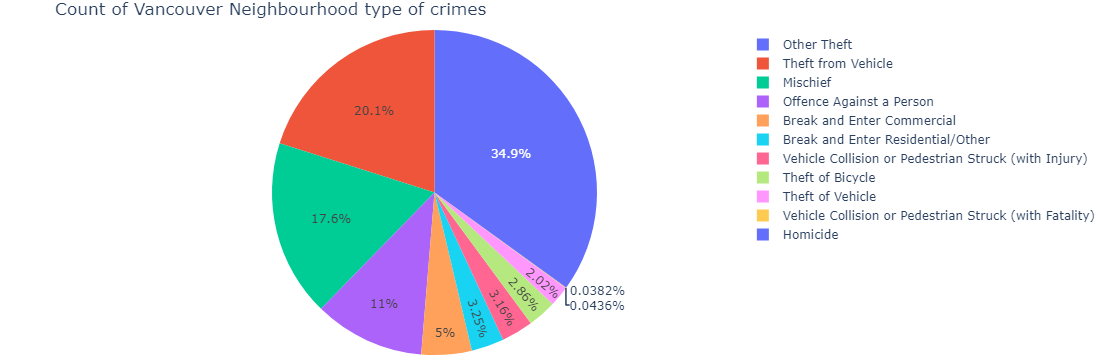

In [808]:
# plot  pie chart
topvenues_piechart = px.pie(
    type_counts,
    names="TYPE",
    values="Crime count",
    color="TYPE"
)

# Update the layout of the chart
topvenues_piechart.update_layout(
    title='Count of Vancouver Neighbourhood type of crimes',
    margin={"r": 0, "t": 30, "l": 0, "b": 0}
)

# Display the pie chart
topvenues_piechart.show()

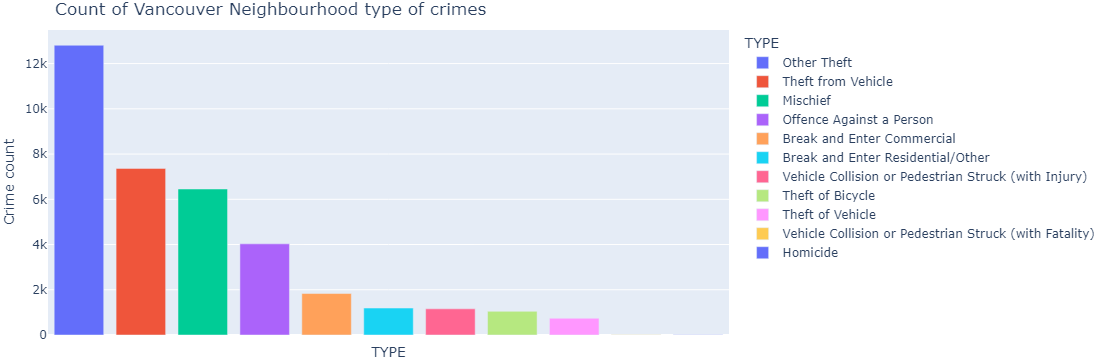

In [809]:
# plot as bar chart
topvenues_barchart = px.bar(
                            type_counts,
                            x="TYPE",
                            y="Crime count", 
                            color="TYPE")


topvenues_barchart.update_layout(title = 'Count of Vancouver Neighbourhood type of crimes',
                         margin={"r":0,"t":30,"l":0,"b":0})

topvenues_barchart.update_xaxes(showticklabels=False) # Removed tick labels as it was too long
topvenues_barchart.show() # Display plot

### Bar chart of Vancouver Nieghbourhood crimes

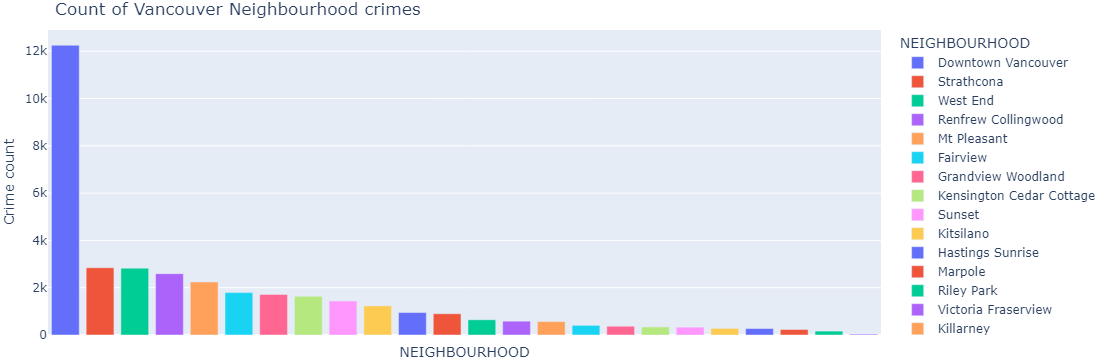

In [810]:
# plot as bar chart
topvenues_barchart = px.bar(
                            neighbourhood_counts,
                            x="NEIGHBOURHOOD",
                            y="Crime count", 
                            color="NEIGHBOURHOOD")


topvenues_barchart.update_layout(title = 'Count of Vancouver Neighbourhood crimes',
                         margin={"r":0,"t":30,"l":0,"b":0})

topvenues_barchart.update_xaxes(showticklabels=False) # Removed tick labels as it was too long
topvenues_barchart.show() # Display plot

### Visualising Top 10 Neighbourhoods with highest crime rates

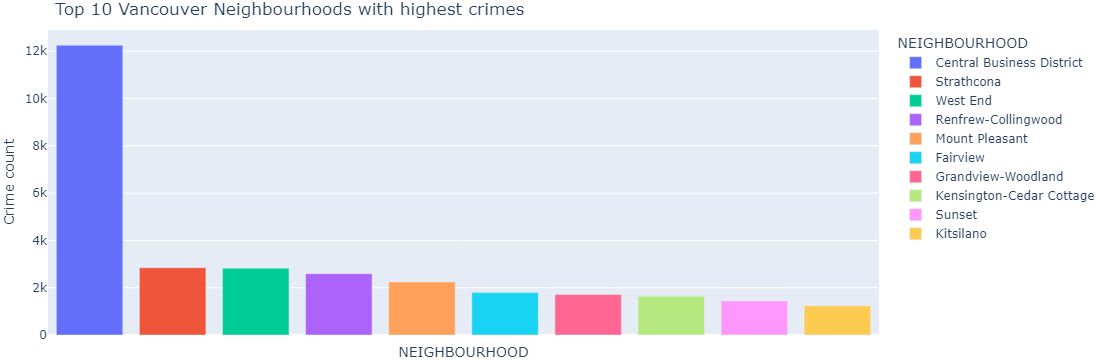

In [811]:
# plot as bar chart
topvenues_barchart = px.bar(
                            top_10_neighbourhoods,
                            x="NEIGHBOURHOOD",
                            y="Crime count", 
                            color="NEIGHBOURHOOD")


topvenues_barchart.update_layout(title = 'Top 10 Vancouver Neighbourhoods with highest crimes',
                         margin={"r":0,"t":30,"l":0,"b":0})

topvenues_barchart.update_xaxes(showticklabels=False) # Removed tick labels as it was too long
topvenues_barchart.show() # Display plot

In [812]:
merged_dataframe

,Neighborhoods,Average rent,Crime count
0,Downtown Vancouver,"$4,273",12253
1,Fairview,"$3,136",1792
2,Hastings Sunrise,"$2,571",950
3,Kensington Cedar Cottage,"$3,012",1634
4,Kitsilano,"$3,489",1232
5,Marpole,"$2,788",899
6,Mt Pleasant,"$3,362",2243
7,Renfrew Collingwood,"$2,458",2594
8,West End,"$3,580",2826


In [813]:
# Clean the 'Average rent' column
merged_dataframe['Average rent'] = merged_dataframe['Average rent'].str.replace('$', '').str.replace(',', '')

# Convert 'Average Rent' to numeric
merged_dataframe['Average rent'] = pd.to_numeric(merged_dataframe['Average rent'])


# correlation between average rent and crime count in neighbourhoods
Correlation = merged_dataframe['Average rent'].corr(merged_dataframe['Crime count'])

# Print the correlation
print(f'Correlation between average rent and crime count: {Correlation}')


Correlation between average rent and crime count: 0.745561612772801


A correlation coefficient of 0.7 indicates a somewhat strong positive relationship between the two variables, meaning that the crime count also tends to increase as the average rent increases. This suggests that there may be a link between higher rental prices and higher crime rates in these neighbourhoods, but it is important to remember that correlation does not imply causation. Other factors could be influencing both rent prices and crime rates.





# 6. Conclusion

From my analysis, I can draw the following conclusions:

- Crime Rates by Neighborhood: I identified neighbourhoods with higher and lower crime rates. This helps in understanding the safety profile of different areas.
  
- Mapping Crime Hotspots: By visualizing crime data on a map, the crime hotspots in Vancouver can be seen, aiding in geographic analysis and decision-making.

  
- Correlation Between Rent and Crime Rate: The correlation analysis shows a significant positive correlation of 0.7 between average rent and crime count, indicating that neighbourhoods with higher crime rates tend to have higher average rents. Still, it is important to remember that correlation does not imply causation. Other factors could be influencing both rent prices and crime rates.
  
Overall, this analysis provides a comprehensive view of how crime rates and rent prices interact across Vancouver neighbourhoods, helping residents and policymakers make informed decisions.

### Thanks for viewing this Notebook. For a more detailed discussion and additional insights, please visit my Medium post on this analysis [here](https://medium.com/@ekofrancis/analysis-of-crime-and-average-rent-in-vancouver-neighbourhoods-c8d0eb223dcd)